In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


### this is already cleaned dataser so lets perform EDA

In [6]:
## droping days month and year column

df_copy=df.drop(columns=['day','month','year'],axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
## Categories in classes
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [9]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

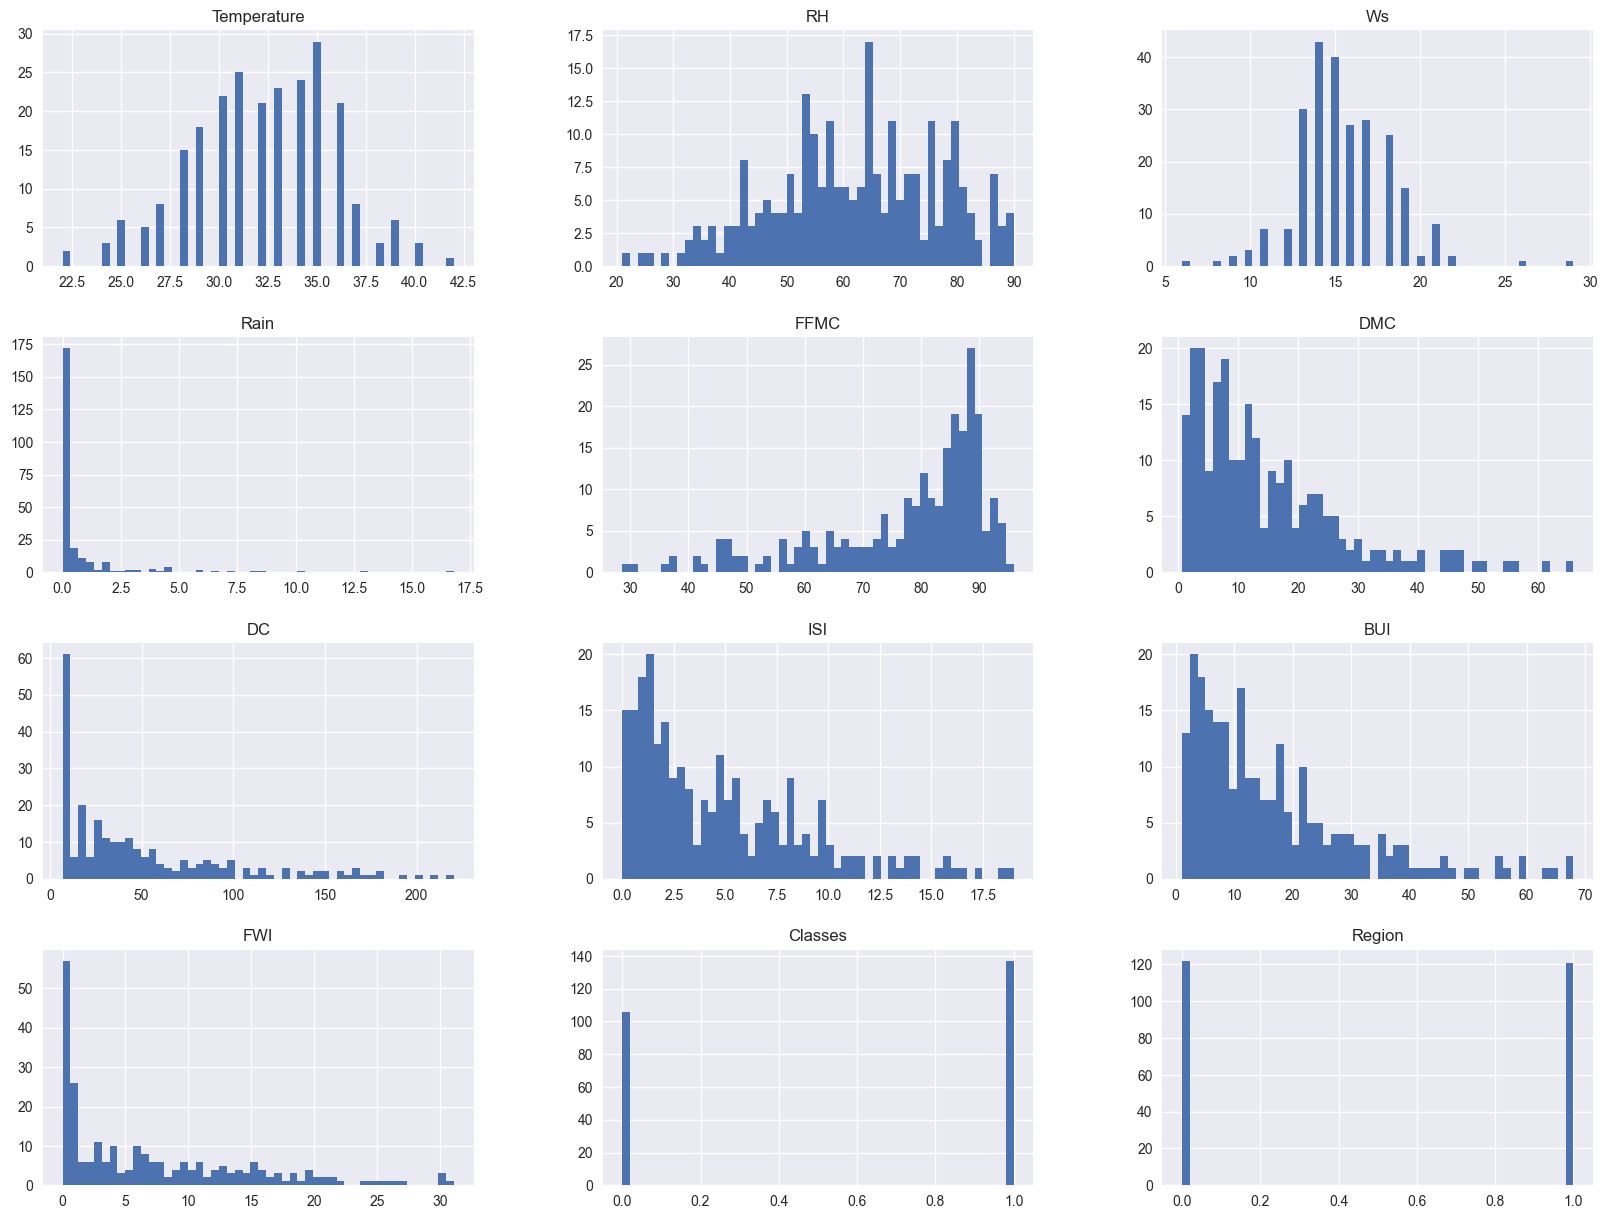

In [11]:
## plot density plot for all features
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
## percentage for pie plot
percentage=df_copy['Classes'].value_counts(normalize=True)*100

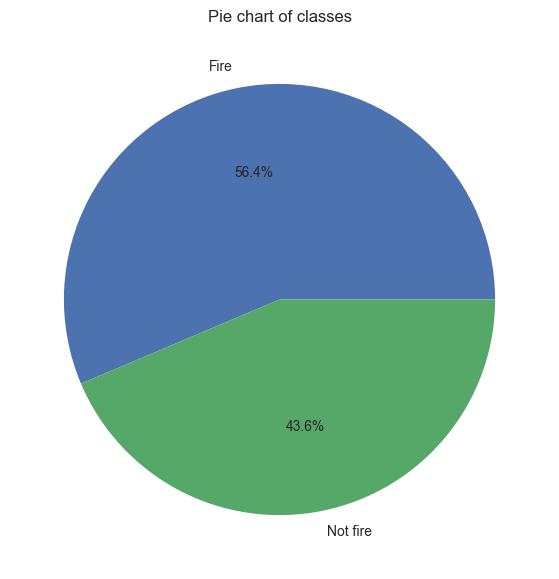

In [13]:
## plotting pie chart

classlabels=['Fire','Not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie chart of classes')
plt.show()

<Axes: ylabel='RH'>

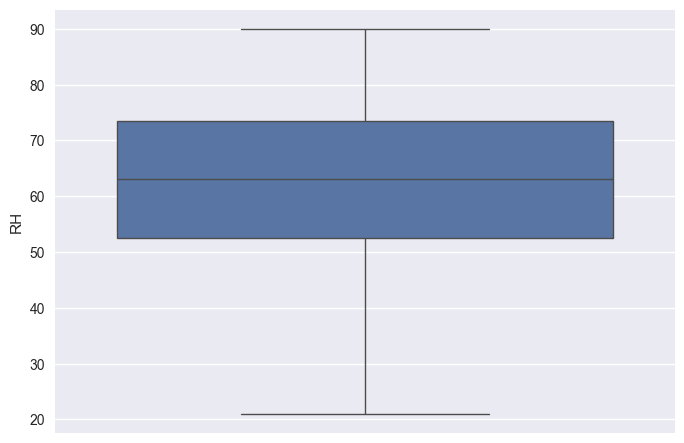

In [14]:
sns.boxplot(df_copy['RH'])

<Axes: >

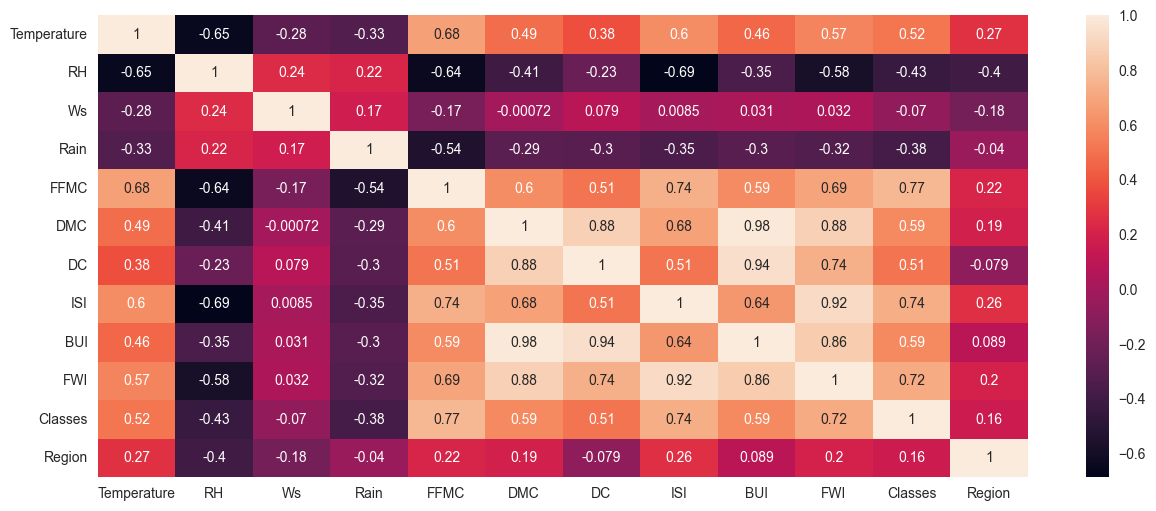

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(),annot=True)

Text(0.5, 1.0, 'Fire analysis for bejai')

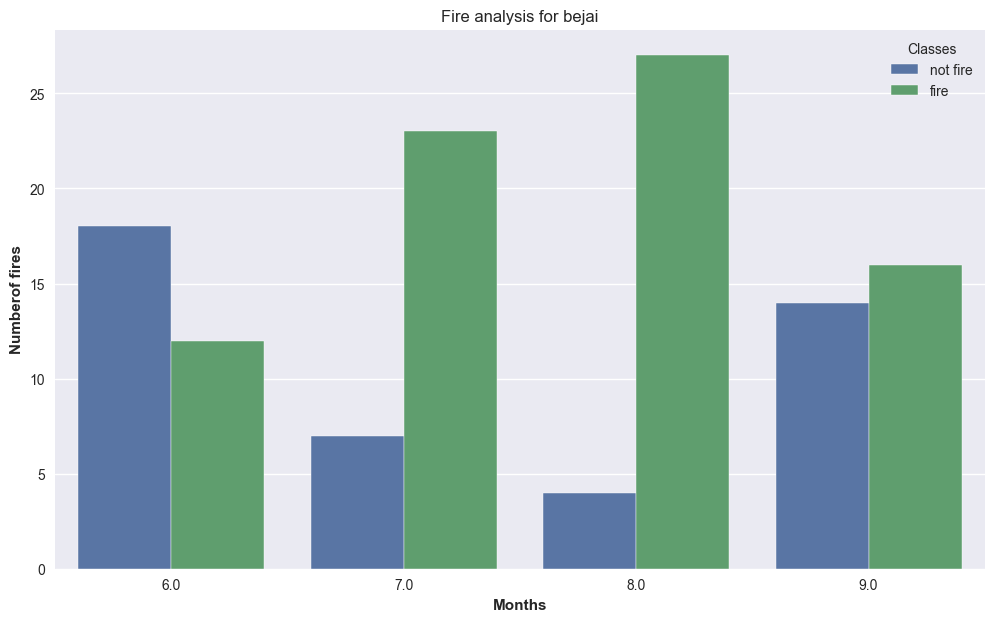

In [16]:
# Monthly fire analysis of bejai

dftemp=df.loc[df['Region']==1]
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
plt.subplots(figsize=(12,7))
sns.set_style('whitegrid')
sns.countplot(x=dftemp['month'],hue=df['Classes'])
plt.ylabel('Numberof fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire analysis for bejai')

Text(0.5, 1.0, 'Fire analysis of Sidi-bel regions')

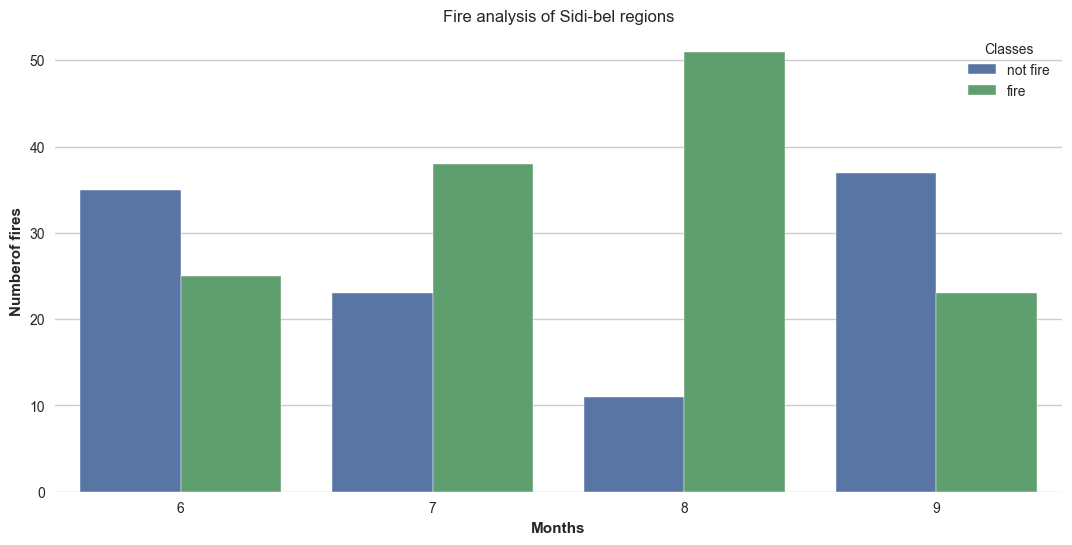

In [17]:
# Monthly fire analysis of bejai
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Numberof fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire analysis of Sidi-bel regions')

In [18]:
## Independent and dependent features
x=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [20]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [21]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features=correlation(x_train,0.85)

In [23]:
corr_features

{'BUI', 'DC'}

In [24]:
## drop features when correlation is greater than 85%

x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape


((182, 9), (61, 9))

## Feature Scaling or Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box plot to understand the effect of standard scaler

In [27]:
import seaborn as sns

Text(0.5, 1.0, 'After Scaling')

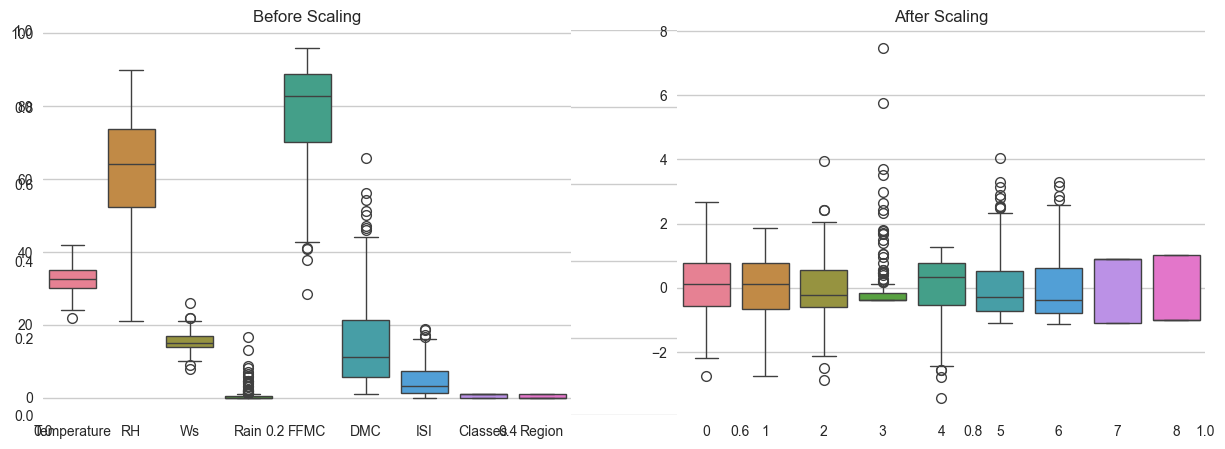

In [28]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
plt.title('After Scaling')

## Applying Linear regression Model

Mean Absolute Error:  0.546823646524997
r2 score:  0.9847657384266951


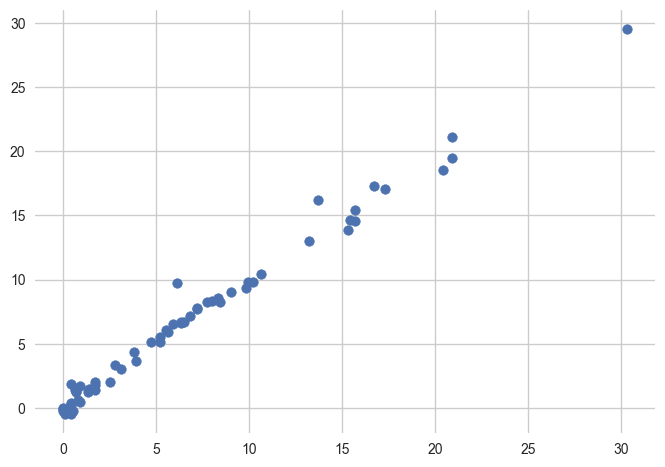

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lin_reg=LinearRegression()

lin_reg.fit(x_train_scaled,y_train)
y_pred=lin_reg.predict(x_test_scaled)

print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("r2 score: ",r2_score(y_test,y_pred))

plt.scatter(y_test,y_pred)


## Lasso Regression

Mean Absolute Error:  1.133175994914409
r2 score:  0.9492020263112388


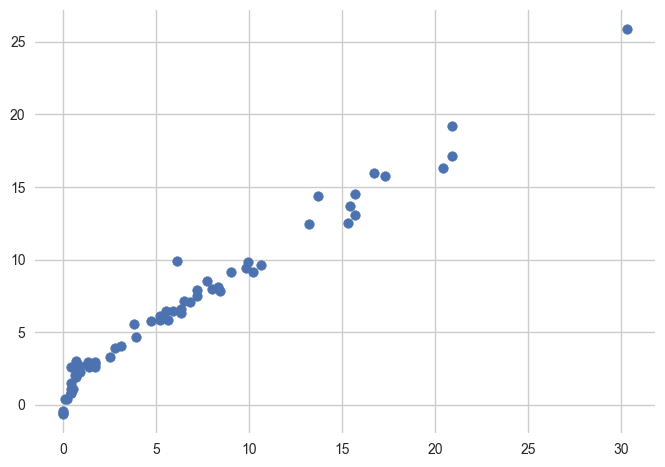

In [30]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso()           # here alpha value will be 1.0 by default

lasso_reg.fit(x_train_scaled,y_train)
y_pred_lasso=lasso_reg.predict(x_test_scaled)

print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred_lasso))
print("r2 score: ",r2_score(y_test,y_pred_lasso))

plt.scatter(y_test,y_pred_lasso)


## cross validation using lasso regression

In [31]:
from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(x_train_scaled,y_train)

y_pred_lasso_cv=lasso_cv.predict(x_test_scaled)

In [32]:
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred_lasso_cv))
print("r2 score: ",r2_score(y_test,y_pred_lasso_cv))

Mean absolute error:  0.6199701158263431
r2 score:  0.9820946715928275


## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
ridge=Ridge()

ridge.fit(x_train_scaled,y_train)
y_pred_ridge=ridge.predict(x_test_scaled)

Mean Absolute Error:  0.5642305340105691
r2 score:  0.9842993364555513


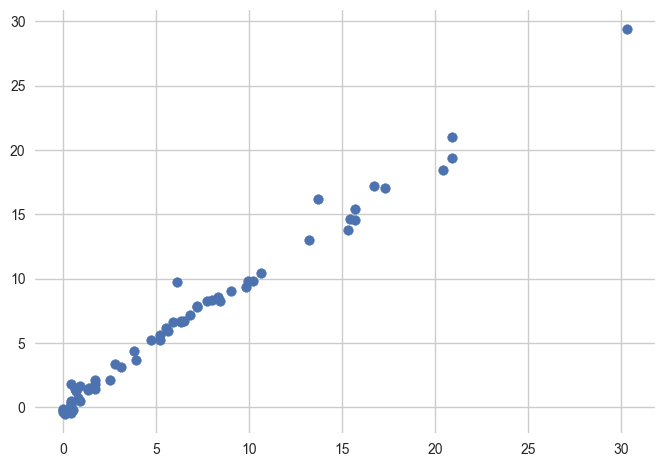

In [34]:
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred_ridge))
print("r2 score: ",r2_score(y_test,y_pred_ridge))
plt.scatter(y_test,y_pred_ridge)

## Ridge regression with cross validation

In [35]:
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(cv=5)
ridge_cv.fit(x_train_scaled,y_train)
y_pred_ridge_cv=ridge_cv.predict(x_test_scaled)

mean absolute error:  0.5642305340105691
r2 score:  0.9842993364555513


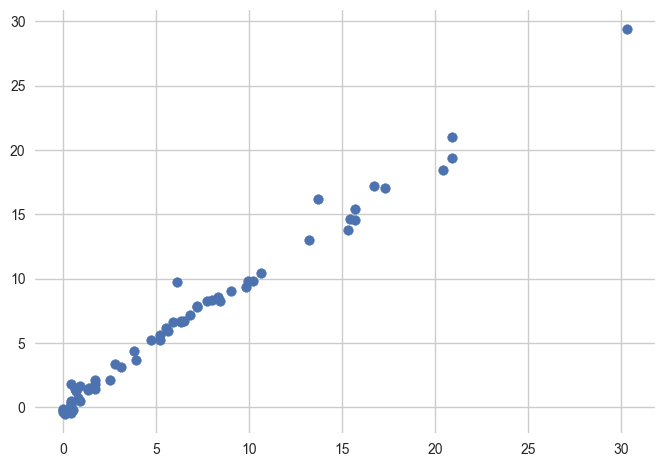

In [36]:
print("mean absolute error: ",mean_absolute_error(y_test,y_pred_ridge_cv))
print("r2 score: ",r2_score(y_test,y_pred_ridge_cv))
plt.scatter(y_test,y_pred_ridge_cv)

In [37]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elastic regression

In [38]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()

elastic.fit(x_train_scaled,y_train)
y_pred_elastic=elastic.predict(x_test_scaled)

mean absolute error:  1.8822353634896
r2 score:  0.8753460589519703


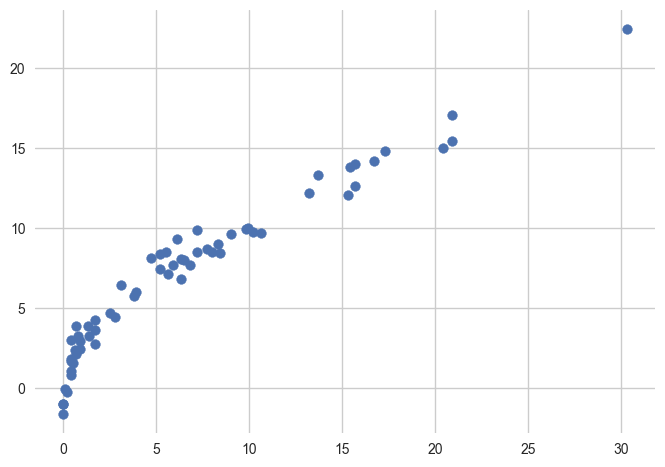

In [39]:
print("mean absolute error: ",mean_absolute_error(y_test,y_pred_elastic))
print("r2 score: ",r2_score(y_test,y_pred_elastic))
plt.scatter(y_test,y_pred_elastic)

#### Now compare the accuracies of all the models and selected model will be selected for pickling

In [40]:
# import pickle
# pickle.dump(scaler,open('scaler.pkl','wb'))
# pickle.dump(ridge,open('ridge.pkl','wb'))
